In [ ]:
import pandas as pd


In [ ]:
df=pd.read_csv('/content/application_train.csv')

In [ ]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33006,138251,0,Cash loans,F,Y,Y,0,90000.0,526491.0,26878.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0
33007,138252,0,Cash loans,F,N,Y,1,180000.0,284400.0,19134.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
33008,138253,0,Cash loans,F,N,Y,0,234000.0,463500.0,15448.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
33009,138254,0,Cash loans,M,Y,Y,0,225000.0,679500.0,27076.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


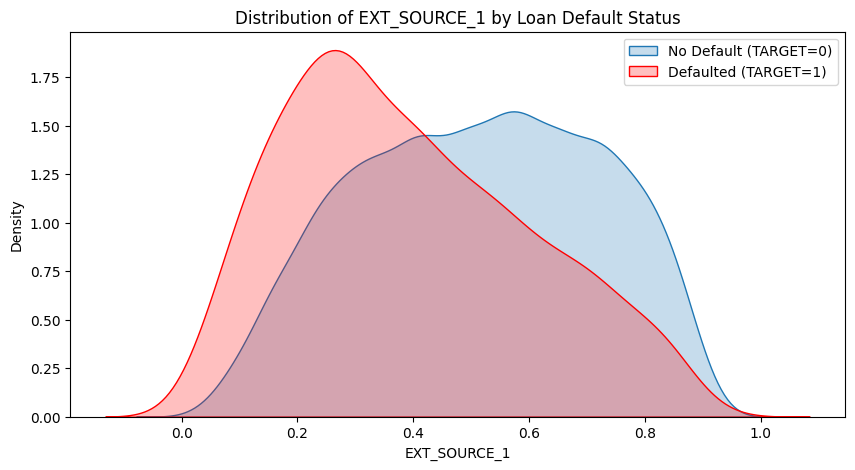

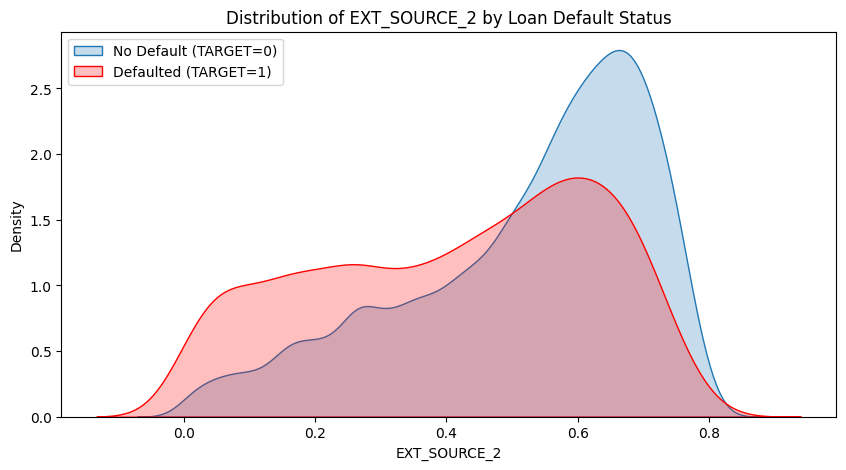

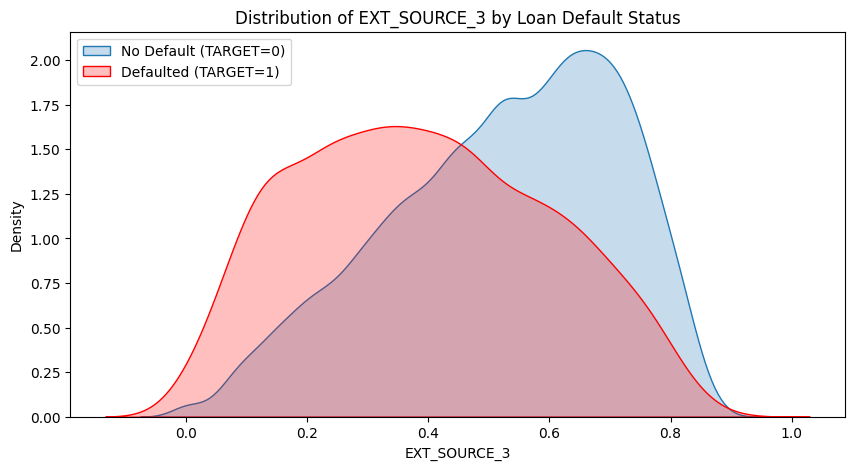

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
ext_sources = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
for source in ext_sources:
    plt.figure(figsize=(10, 5))
    sns.kdeplot(data=df[df['TARGET'] == 0], x=source, label='No Default (TARGET=0)', fill=True)
    sns.kdeplot(data=df[df['TARGET'] == 1], x=source, label='Defaulted (TARGET=1)', fill=True, color='red')
    plt.title(f'Distribution of {source} by Loan Default Status')
    plt.xlabel(source)
    plt.ylabel('Density')
    plt.legend()
    plt.show()



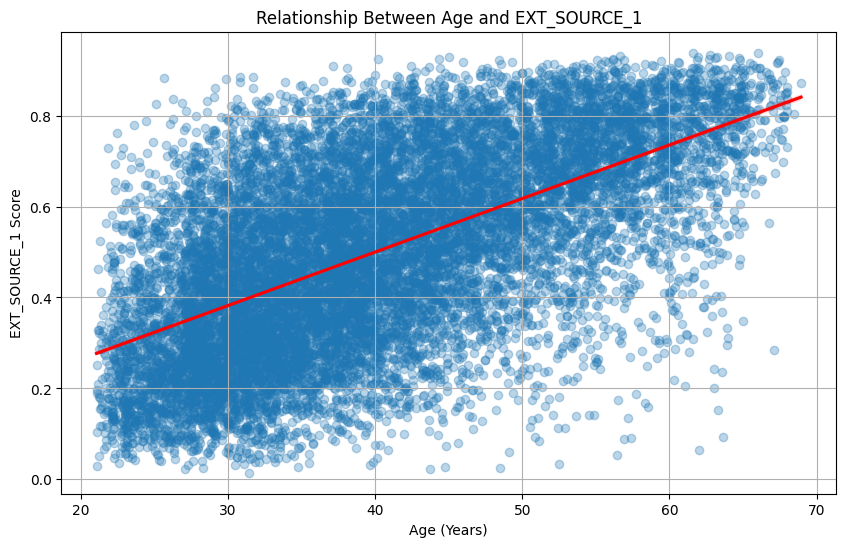

In [ ]:
df['AGE_YEARS'] = (-df['DAYS_BIRTH']) / 365
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.regplot(df, x='AGE_YEARS', y='EXT_SOURCE_1', scatter_kws={'alpha':0.3}, line_kws={"color": "red"})
plt.title('Relationship Between Age and EXT_SOURCE_1')
plt.xlabel('Age (Years)')
plt.ylabel('EXT_SOURCE_1 Score')
plt.grid(True)
plt.show()


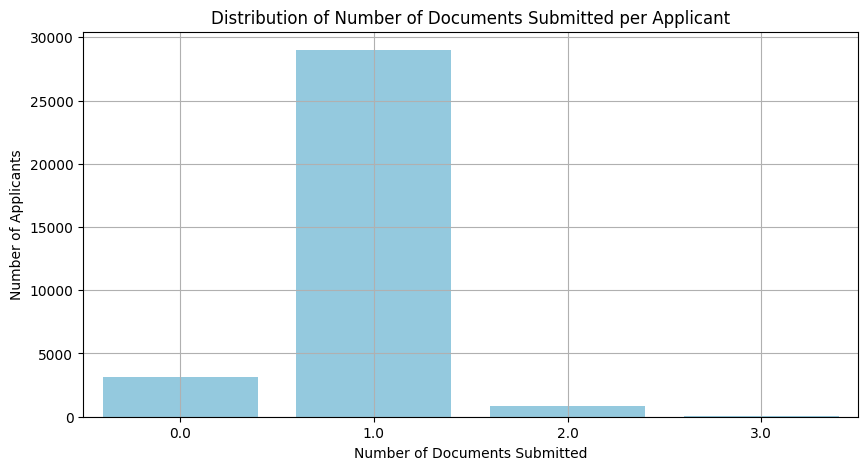

In [ ]:
doc_cols = [col for col in df.columns if col.startswith('FLAG_DOCUMENT_')]
df['NUM_DOCUMENTS_SUBMITTED'] = df[doc_cols].sum(axis=1)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(x='NUM_DOCUMENTS_SUBMITTED', data=df, color='skyblue')
plt.title('Distribution of Number of Documents Submitted per Applicant')
plt.xlabel('Number of Documents Submitted')
plt.ylabel('Number of Applicants')
plt.grid(True)
plt.show()


   Document 3 Submitted  Default Rate
0                   0.0      0.059336
1                   1.0      0.089280


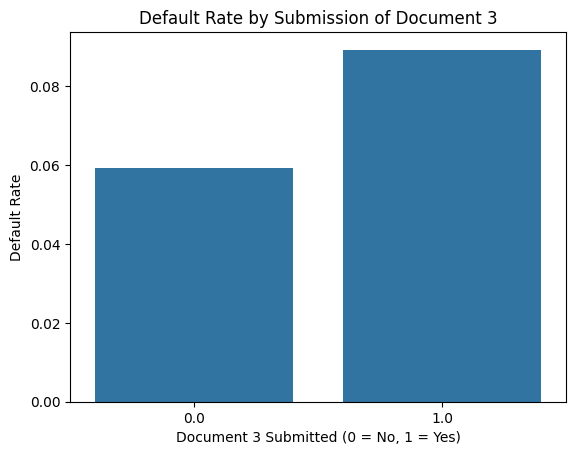

In [ ]:
import pandas as pd
doc3_default_rate = df.groupby('FLAG_DOCUMENT_3')['TARGET'].mean().reset_index()

doc3_default_rate.columns = ['Document 3 Submitted', 'Default Rate']

print(doc3_default_rate)
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=doc3_default_rate, x='Document 3 Submitted', y='Default Rate')
plt.title('Default Rate by Submission of Document 3')
plt.ylabel('Default Rate')
plt.xlabel('Document 3 Submitted (0 = No, 1 = Yes)')
plt.show()



    Credit Bureau Inquiries (Last Year)  Default Rate
0                                   0.0      0.069461
1                                   1.0      0.079372
2                                   2.0      0.073015
3                                   3.0      0.078261
4                                   4.0      0.087883
5                                   5.0      0.080994
6                                   6.0      0.082999
7                                   7.0      0.117073
8                                   8.0      0.117155
9                                   9.0      0.130841
10                                 10.0      0.000000
11                                 11.0      0.142857
12                                 12.0      0.000000
13                                 13.0      0.000000
14                                 16.0      0.500000
15                                 23.0      0.000000
16                                 25.0      0.000000


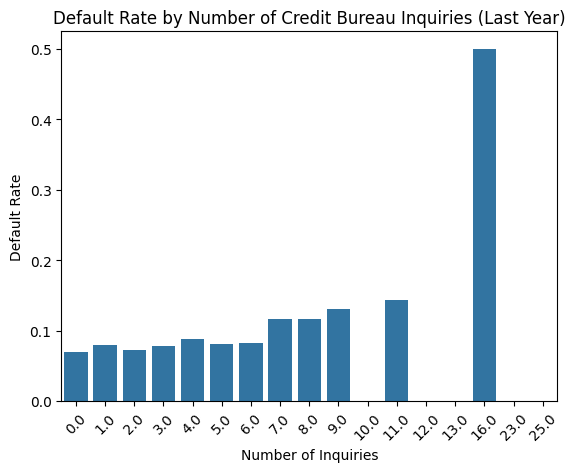

In [ ]:
import pandas as pd
inquiry_default_rate = df.groupby('AMT_REQ_CREDIT_BUREAU_YEAR')['TARGET'].mean().reset_index()
inquiry_default_rate.columns = ['Credit Bureau Inquiries (Last Year)', 'Default Rate']

print(inquiry_default_rate)
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=inquiry_default_rate, x='Credit Bureau Inquiries (Last Year)', y='Default Rate')
plt.title('Default Rate by Number of Credit Bureau Inquiries (Last Year)')
plt.xlabel('Number of Inquiries')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)
plt.show()
